
<div class="alert alert-block alert-info"><font size="5"><center><b><u>Sprint6_Tasca mètodes de mostreig
   </u></b></center></font>
\begin{align*}Marc\:Breysse\end{align*}

<span style=color:blue>*Aprèn a realitzar mostreig de les dades amb Python*</span>

https://towardsdatascience.com/the-5-sampling-algorithms-every-data-scientist-need-to-know-43c7bc11d17c

# <span style=color:darkblue>Nivell 1</span>

<u style=color:blue>Exercici 1:</u>

<span style=color:blue>Agafa un conjunt de dades de tema esportiu que t'agradi. Realitza un mostreig de les dades generant una mostra aleatòria simple i una mostra sistemàtica.</span>

 #### <span style=color:green><ins> Mostra aleatòria simple de 100 mostres  </ins></span>

In [39]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import timeit
import random

In [40]:
#pd.read_csv('Web_access_log-akumenius.com.txt', sep='delimiter', header=None, engine='python')

Mlb = pd.read_csv('MLB.txt', sep='\t', encoding='utf-8')

In [41]:
Mlb.shape

(828, 4)

In [42]:
Mlb.columns

Index(['player', 'team', 'position', 'salary'], dtype='object')

In [43]:
Mlb.head(7)

,player,team,position,salary
0,Brandon Webb,Arizona Diamondbacks,Pitcher,8500.0
1,Danny Haren,Arizona Diamondbacks,Pitcher,8250.0
2,Chris Snyder,Arizona Diamondbacks,Catcher,5250.0
3,Edwin Jackson,Arizona Diamondbacks,Pitcher,4600.0
4,Adam LaRoche,Arizona Diamondbacks,First Baseman,4500.0
5,Chad Qualls,Arizona Diamondbacks,Pitcher,4185.0
6,Chris B. Young,Arizona Diamondbacks,Outfielder,3450.0


In [44]:
random.seed(3)
k = 10
MlbSampleSimple = Mlb.sample(k)
MlbSampleSimple.shape

(10, 4)

<span style=color:blue><b><em>In case of Numpy array</em></b></span>

- <span style=color:blue>population = [2,5,7,8,9]</span> 
- <span style=color:blue>k = 2</span> 
- <span style=color:blue>random.sample(population, k)</span> 

In [45]:
MlbSampleSimple

,player,team,position,salary
201,Joe Smith,Cleveland Indians,Pitcher,427.5
329,David DeJesus,Kansas City Royals,Outfielder,4700.0
813,Wil Nieves,Washington Nationals,Catcher,700.0
404,Ron Belisario,Los Angeles Dodgers,Pitcher,412.5
754,Nelson R. Cruz,Texas Rangers,Outfielder,440.0
593,Delwyn Young,Pittsburgh Pirates,Outfielder,444.5
198,Mark Grudzielanek,Cleveland Indians,Second Baseman,600.0
155,Andruw Jones,Chicago White Sox,Designated Hitter,500.0
51,Diory Hernandez,Atlanta Braves,Shortstop,400.0
395,Ramon Ortiz,Los Angeles Dodgers,Pitcher,1000.0


In [46]:
MlbSampleSimple.sort_index()

,player,team,position,salary
51,Diory Hernandez,Atlanta Braves,Shortstop,400.0
155,Andruw Jones,Chicago White Sox,Designated Hitter,500.0
198,Mark Grudzielanek,Cleveland Indians,Second Baseman,600.0
201,Joe Smith,Cleveland Indians,Pitcher,427.5
329,David DeJesus,Kansas City Royals,Outfielder,4700.0
395,Ramon Ortiz,Los Angeles Dodgers,Pitcher,1000.0
404,Ron Belisario,Los Angeles Dodgers,Pitcher,412.5
593,Delwyn Young,Pittsburgh Pirates,Outfielder,444.5
754,Nelson R. Cruz,Texas Rangers,Outfielder,440.0
813,Wil Nieves,Washington Nationals,Catcher,700.0


 #### <span style=color:green><ins> Mostra sistemàtica cada 6 files  </ins></span>
 https://www.statology.org/systematic-sampling-in-pandas/

In [47]:
sys_sample_Mlb = Mlb.iloc[::6]
sys_sample_Mlb

,player,team,position,salary
0,Brandon Webb,Arizona Diamondbacks,Pitcher,8500.0
6,Chris B. Young,Arizona Diamondbacks,Outfielder,3450.0
12,Miguel Montero,Arizona Diamondbacks,Catcher,2000.0
18,Juan C. Gutierrez,Arizona Diamondbacks,Pitcher,411.0
24,Rusty Ryal,Arizona Diamondbacks,Third Baseman,401.0
...,...,...,...,...
798,Adam Dunn,Washington Nationals,First Baseman,12000.0
804,Ivan Rodriguez,Washington Nationals,Catcher,3000.0
810,Sean Burnett,Washington Nationals,Pitcher,775.0
816,John Lannan,Washington Nationals,Pitcher,458.0


# <span style=color:darkblue>Nivell 2</span>

<u style=color:blue>Exercici 2:</u>

<span style=color:blue>Continua amb el conjunt de dades de tema esportiu i genera una mostra estratificada i una mostra utilitzant SMOTE (Synthetic Minority Oversampling Technique).</span>

 #### <span style=color:green><ins> Mostra estratificada de 100 mostres (12% de cada posición existent) </ins></span>

In [48]:
MlbStratified = Mlb.groupby('position', group_keys = True).apply(pd.DataFrame.sample, frac=.120)
MlbStratified.head(15)

player                  team  \
position                                                       
Catcher           812     Jesus Flores  Washington Nationals   
                  813       Wil Nieves  Washington Nationals   
                  639    Bengie Molina  San Francisco Giants   
                  500     Jorge Posada      New York Yankees   
                  656    Eli Whiteside  San Francisco Giants   
                  397      Brad Ausmus   Los Angeles Dodgers   
                  12    Miguel Montero  Arizona Diamondbacks   
                  814      Chris Coste  Washington Nationals   
Designated Hitter 445      Jason Kubel       Minnesota Twins   
First Baseman     40       Eric Hinske        Atlanta Braves   
                  606  Adrian Gonzalez      San Diego Padres   
                  393      James Loney   Los Angeles Dodgers   
                  497    Mark Teixeira      New York Yankees   
                  345     Billy Butler    Kansas City Royals   
Outfielder        358    Hideki Matsui   Los Angeles Angeles   

                                position   salary  
position                                           
Catcher           812            Catcher    750.0  
                  813            Catcher    700.0  
                  639            Catcher   4500.0  
                  500            Catcher  13100.0  
                  656            Catcher    405.0  
                  397            Catcher    850.0  
                  12             Catcher   2000.0  
                  814            Catcher    650.0  
Designated Hitter 445  Designated Hitter   4100.0  
First Baseman     40       First Baseman   1000.0  
                  606      First Baseman   4875.0  
                  393      First Baseman   3100.0  
                  497      First Baseman  20625.0  
                  345      First Baseman    470.0  
Outfielder        358         Outfielder   6000.0

In [49]:
MlbStratified.shape

(100, 4)

<span style=color:green><ins> Mostra estratificada de 100 mostres amb "Train-Test" </ins></span>

https://www.w3schools.com/python/python_ml_train_test.asp

In [50]:
from sklearn.model_selection import train_test_split
Mlb_train, Mlb_test = train_test_split(Mlb, test_size=100, stratify = Mlb['position'])

In [51]:
Mlb_test.sort_index()

,player,team,position,salary
1,Danny Haren,Arizona Diamondbacks,Pitcher,8250.000
7,Stephen Drew,Arizona Diamondbacks,Shortstop,3400.000
29,Kenshin Kawakami,Atlanta Braves,Pitcher,7333.666
33,Takashi Saito,Atlanta Braves,Pitcher,3200.000
37,Troy Glaus,Atlanta Braves,First Baseman,1750.000
...,...,...,...,...
790,Brandon Morrow,Toronto Blue Jays,Pitcher,409.800
791,Merkin Valdez,Toronto Blue Jays,Pitcher,409.500
800,Jason Marquis,Washington Nationals,Pitcher,7500.000
802,Josh Willingham,Washington Nationals,Outfielder,4600.000


 #### <span style=color:green><ins> Mostra SMOTE (Synthetic Minority Oversampling Technique)  </ins></span>
 https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

https://towardsdatascience.com/how-to-effortlessly-handle-class-imbalance-with-python-and-smote-9b715ca8e5a7

https://towardsdatascience.com/5-smote-techniques-for-oversampling-your-imbalance-data-b8155bdbe2b5

In [52]:
# count positions
Mlb.set_index(["position","team"]).count(level="position")

,player,salary
position,,
Catcher,67,67
Designated Hitter,7,7
First Baseman,42,42
Infielder,4,4
Outfielder,148,148
Pitcher,410,410
Second Baseman,48,48
Shortstop,56,56
Third Baseman,46,46


#### <span style=color:green><ins> 'Designated Hitler' and 'Infielder' categories have very few samples....Let's oversample  </ins></span>

<span style=color:green><ins> Data preparation to get read of textual data  </ins></span>

In [61]:
# Remap to integers: N/A since no variables with 2 outputs

# Create dummy variables
dummy_position_type = pd.get_dummies(Mlb['position'], prefix='position', drop_first=True)

# Drop unnecessary columns
to_drop = ['player', 'team', 'position']
Mlb.drop(to_drop, axis=1, inplace=True)

# Add new random column
Mlb['randNumCol'] = np.random.randint(0,828, size=len(Mlb))

# Merge into a single data frame
merged = pd.concat([Mlb, dummy_position_type], axis=1)
merged.head()

,salary,randNumCol,position_Designated Hitter,position_First Baseman,position_Infielder,position_Outfielder,position_Pitcher,position_Second Baseman,position_Shortstop,position_Third Baseman
0,8500.0,127,0,0,0,0,1,0,0,0
1,8250.0,730,0,0,0,0,1,0,0,0
2,5250.0,218,0,0,0,0,0,0,0,0
3,4600.0,659,0,0,0,0,1,0,0,0
4,4500.0,539,0,1,0,0,0,0,0,0


In [62]:
merged.shape

(828, 10)

In [63]:
merged_r = merged[['salary', 'randNumCol','position_Shortstop']]
merged_r.head()

,salary,randNumCol,position_Shortstop
0,8500.0,127,0
1,8250.0,730,0
2,5250.0,218,0
3,4600.0,659,0
4,4500.0,539,0


<AxesSubplot:xlabel='salary', ylabel='randNumCol'>

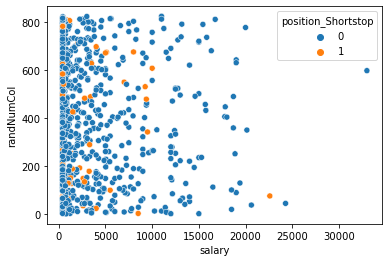

In [64]:
sns.scatterplot(data = merged_r, x ='salary', y = 'randNumCol', hue = 'position_Shortstop')

<span style=color:green><ins> Smote  </ins></span>

## <span style=color:red><ins> To be done in Sprint 14  </ins></span>

# <span style=color:darkblue>Nivell 3</span>

<u style=color:blue>Exercici 3:</u>

<span style=color:blue>Continua amb el conjunt de dades de tema esportiu i genera una mostra utilitzant el mètode Reservoir sampling</span>

https://towardsdatascience.com/the-5-sampling-algorithms-every-data-scientist-need-to-know-43c7bc11d17c

In [65]:
Mlb = pd.read_csv('MLB.txt', sep='\t', encoding='utf-8')
Mlb.head()

,player,team,position,salary
0,Brandon Webb,Arizona Diamondbacks,Pitcher,8500.0
1,Danny Haren,Arizona Diamondbacks,Pitcher,8250.0
2,Chris Snyder,Arizona Diamondbacks,Catcher,5250.0
3,Edwin Jackson,Arizona Diamondbacks,Pitcher,4600.0
4,Adam LaRoche,Arizona Diamondbacks,First Baseman,4500.0


<span style=color:green><ins> Dataframe to array  </ins></span>

In [66]:
stream = Mlb.to_numpy()

<span style=color:green><ins> Reservoir sampling of 4 samples  </ins></span>

In [72]:
# Doing Reservoir Sampling from the stream
k=4
reservoir = []
for i, element in enumerate(stream):
    if i+1<= k:
        reservoir.append(element)
    else:
        probability = k/(i+1)
        if random.random() < probability:
            # Select item in stream and remove one of the k items already selected
             reservoir[random.choice(range(0,k))] = element
print(reservoir)

[array(['Jair Jurrjens', 'Atlanta Braves', 'Pitcher', 480.0], dtype=object), array(['Andres Blanco', 'Texas Rangers', 'Shortstop', 510.0], dtype=object), array(['Rusty Ryal', 'Arizona Diamondbacks', 'Third Baseman', 401.0],
      dtype=object), array(['Magglio Ordonez', 'Detroit Tigers', 'Outfielder',
       17825.976000000002], dtype=object)]


In [74]:
reservoir_df = pd.DataFrame(data=reservoir, columns=["player", "team","position", "salary"])
reservoir_df.head()

,player,team,position,salary
0,Jair Jurrjens,Atlanta Braves,Pitcher,480.000
1,Andres Blanco,Texas Rangers,Shortstop,510.000
2,Rusty Ryal,Arizona Diamondbacks,Third Baseman,401.000
3,Magglio Ordonez,Detroit Tigers,Outfielder,17825.976
